In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_ny = geolocator.geocode(address)
latitude_ny = location_ny.latitude
longitude_ny = location_ny.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='label',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:
flushing_data = neighborhoods[neighborhoods['Neighborhood'] == 'Flushing'].reset_index(drop=True)
flushing_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Flushing,40.764454,-73.831773


In [15]:
address1 = 'Flushing, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_flushing = geolocator.geocode(address1)
latitude_flushing = location_flushing.latitude
longitude_flushing = location_flushing.longitude
print('The geograpical coordinate of Flushing are {}, {}.'.format(latitude_flushing, longitude_flushing))

The geograpical coordinate of Flushing are 40.7654301, -73.8174291.


In [16]:
# create map of Flushing using latitude and longitude values
map_flushing = folium.Map(location=[latitude_flushing, longitude_flushing], zoom_start=11)
folium.CircleMarker(
        [latitude_flushing, longitude_flushing],
        radius=10,
        popup='Flushing',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_flushing)  
    
map_flushing


In [17]:
CLIENT_ID = 'F0M0XXLLM3FBLRJORC4JFMVAN5JBR3SWHZSO0TSCV2ODNMWS' # your Foursquare ID
CLIENT_SECRET = '5OFQZPJY5TPUUPO1GSTLK110LVATDBEF0ETRMCTTHBEXIQKY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F0M0XXLLM3FBLRJORC4JFMVAN5JBR3SWHZSO0TSCV2ODNMWS
CLIENT_SECRET:5OFQZPJY5TPUUPO1GSTLK110LVATDBEF0ETRMCTTHBEXIQKY


In [18]:
flushing_data.loc[0, 'Neighborhood']

'Flushing'

In [19]:
flushing_latitude = flushing_data.loc[0, 'Latitude'] # neighborhood latitude value
flushing_longitude = flushing_data.loc[0, 'Longitude'] # neighborhood longitude value

flushing_name = flushing_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(flushing_name, 
                                                               flushing_latitude, 
                                                               flushing_longitude))

Latitude and longitude values of Flushing are 40.76445419697846, -73.83177300329582.


In [20]:
# Foursquare data download

LIMIT = 100 
radius = 500

# create URL
url_flushing = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flushing_latitude, 
    flushing_longitude, 
    radius, 
    LIMIT)
url_flushing

'https://api.foursquare.com/v2/venues/explore?&client_id=F0M0XXLLM3FBLRJORC4JFMVAN5JBR3SWHZSO0TSCV2ODNMWS&client_secret=5OFQZPJY5TPUUPO1GSTLK110LVATDBEF0ETRMCTTHBEXIQKY&v=20180605&ll=40.76445419697846,-73.83177300329582&radius=500&limit=100'

In [21]:
# Make json file

results_flushing = requests.get(url_flushing).json()
results_flushing

{'meta': {'code': 200, 'requestId': '5db435012c2017002bfcb8aa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Flushing',
  'headerFullLocation': 'Flushing, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 60,
  'suggestedBounds': {'ne': {'lat': 40.768954201478465,
    'lng': -73.82584271444155},
   'sw': {'lat': 40.75995419247846, 'lng': -73.8377032921501}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae39cb6f964a520439721e3',
       'name': 'Debasaki',
       'location': {'address': '33-67 Farrington St',
        'lat': 40.764851521130126,
        'lng': -73.83176733519196,
        'labeledLatLngs': [{'label'

In [22]:
# Get location info for Seoul

address2 = 'Seoul'

geolocator = Nominatim(user_agent="ny_explorer")
location_seoul = geolocator.geocode(address2)
latitude_seoul = location_seoul.latitude
longitude_seoul = location_seoul.longitude
print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude_seoul, longitude_seoul))

The geograpical coordinate of Seoul are 37.5666791, 126.9782914.


In [23]:
# create map of Manhattan using latitude and longitude values
map_seoul = folium.Map(location=[latitude_seoul, longitude_seoul], zoom_start=11)

folium.CircleMarker(
        [latitude_seoul, longitude_seoul],
        radius=10,
        popup='Seoul',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul)  
    
map_seoul

In [24]:
seoul_latitude = 37.5172489 # neighborhood latitude value
seoul_longitude = 127.0473146 # neighborhood longitude value

seoul_name = 'Seoul' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(seoul_name, 
                                                               seoul_latitude, 
                                                               seoul_longitude))

Latitude and longitude values of Seoul are 37.5172489, 127.0473146.


In [25]:
LIMIT = 100 
radius = 500

# create URL
url_seoul = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_seoul, 
    longitude_seoul, 
    radius, 
    LIMIT)
url_seoul

'https://api.foursquare.com/v2/venues/explore?&client_id=F0M0XXLLM3FBLRJORC4JFMVAN5JBR3SWHZSO0TSCV2ODNMWS&client_secret=5OFQZPJY5TPUUPO1GSTLK110LVATDBEF0ETRMCTTHBEXIQKY&v=20180605&ll=37.5666791,126.9782914&radius=500&limit=100'

In [26]:
results_seoul = requests.get(url_seoul).json()
results_seoul

{'meta': {'code': 200, 'requestId': '5db43502be7078002cb93887'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Myeong-dong',
  'headerFullLocation': 'Myeong-dong, Seoul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 125,
  'suggestedBounds': {'ne': {'lat': 37.571179104500004,
    'lng': 126.98395800508577},
   'sw': {'lat': 37.5621790955, 'lng': 126.97262479491424}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba1a9adf964a5209bc637e3',
       'name': '무교동북어국집',
       'location': {'address': '중구 을지로1길 38',
        'lat': 37.56785175829164,
        'lng': 126.97975259179273,
        'labeledLatLngs': [{'label': 'display',
          'lat': 37.56785175829164

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues_seoul = results_seoul['response']['groups'][0]['items']
    
nearby_venues_seoul = json_normalize(venues_seoul) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_seoul =nearby_venues_seoul.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_seoul['venue.categories'] = nearby_venues_seoul.apply(get_category_type, axis=1)

# clean columns
nearby_venues_seoul.columns = [col.split(".")[-1] for col in nearby_venues_seoul.columns]

nearby_venues_seoul.head()

,name,categories,lat,lng
0,무교동북어국집,Korean Restaurant,37.567852,126.979753
1,Seoul Plaza (서울광장),Pedestrian Plaza,37.565475,126.977937
2,Läderach chocolatier suisse,Chocolate Shop,37.568153,126.978265
3,THE LOUNGE,Lounge,37.565270,126.977918
4,The Plaza Hotel (더 플라자),Hotel,37.564621,126.978060


In [29]:
print('{} venues in seoul were returned by Foursquare.'.format(nearby_venues_seoul.shape[0]))

100 venues in seoul were returned by Foursquare.


In [30]:
venues_flushing = results_flushing['response']['groups'][0]['items']
    
nearby_venues_flushing = json_normalize(venues_flushing) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_flushing =nearby_venues_flushing.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_flushing['venue.categories'] = nearby_venues_flushing.apply(get_category_type, axis=1)

# clean columns
nearby_venues_flushing.columns = [col.split(".")[-1] for col in nearby_venues_flushing.columns]

nearby_venues_flushing.head()

,name,categories,lat,lng
0,Debasaki,Korean Restaurant,40.764852,-73.831767
1,Flushing Town Hall,Performing Arts Venue,40.763623,-73.830139
2,New York Badminton Center,Gym / Fitness Center,40.765300,-73.834438
3,Joo Mak Gol Korean Restaurant,Food,40.763729,-73.831496
4,Bodhi Fitness Center,Gym,40.763666,-73.833211


In [31]:
print('{} venues in flushing were returned by Foursquare.'.format(nearby_venues_flushing.shape[0]))

60 venues in flushing were returned by Foursquare.


In [32]:
nearby_venues_flushing.groupby('categories').count()

,name,lat,lng
categories,,,
Asian Restaurant,2,2,2
BBQ Joint,1,1,1
Bakery,2,2,2
Bar,1,1,1
Bubble Tea Shop,3,3,3
Café,1,1,1
Cantonese Restaurant,1,1,1
Chinese Restaurant,5,5,5
Church,1,1,1


In [33]:
nearby_venues_seoul.groupby('categories').count()

,name,lat,lng
categories,,,
Art Museum,3,3,3
BBQ Joint,1,1,1
Bagel Shop,1,1,1
Bakery,3,3,3
Beer Garden,1,1,1
Bistro,1,1,1
Bookstore,3,3,3
Bossam/Jokbal Restaurant,2,2,2
Buffet,2,2,2


In [ ]:
# Want to draw bar chart by category for each area. What business category have many portion and how about cafe in Flushing area?

import matplotlib as mat
import matplotlib.pyplot as plt

In [43]:
df_seoul=nearby_venues_seoul.groupby('categories').count()
df_flushing=nearby_venues_flushing.groupby('categories').count()

In [44]:
df_seoul.head()

,name,lat,lng
categories,,,
Art Museum,3,3,3
BBQ Joint,1,1,1
Bagel Shop,1,1,1
Bakery,3,3,3
Beer Garden,1,1,1


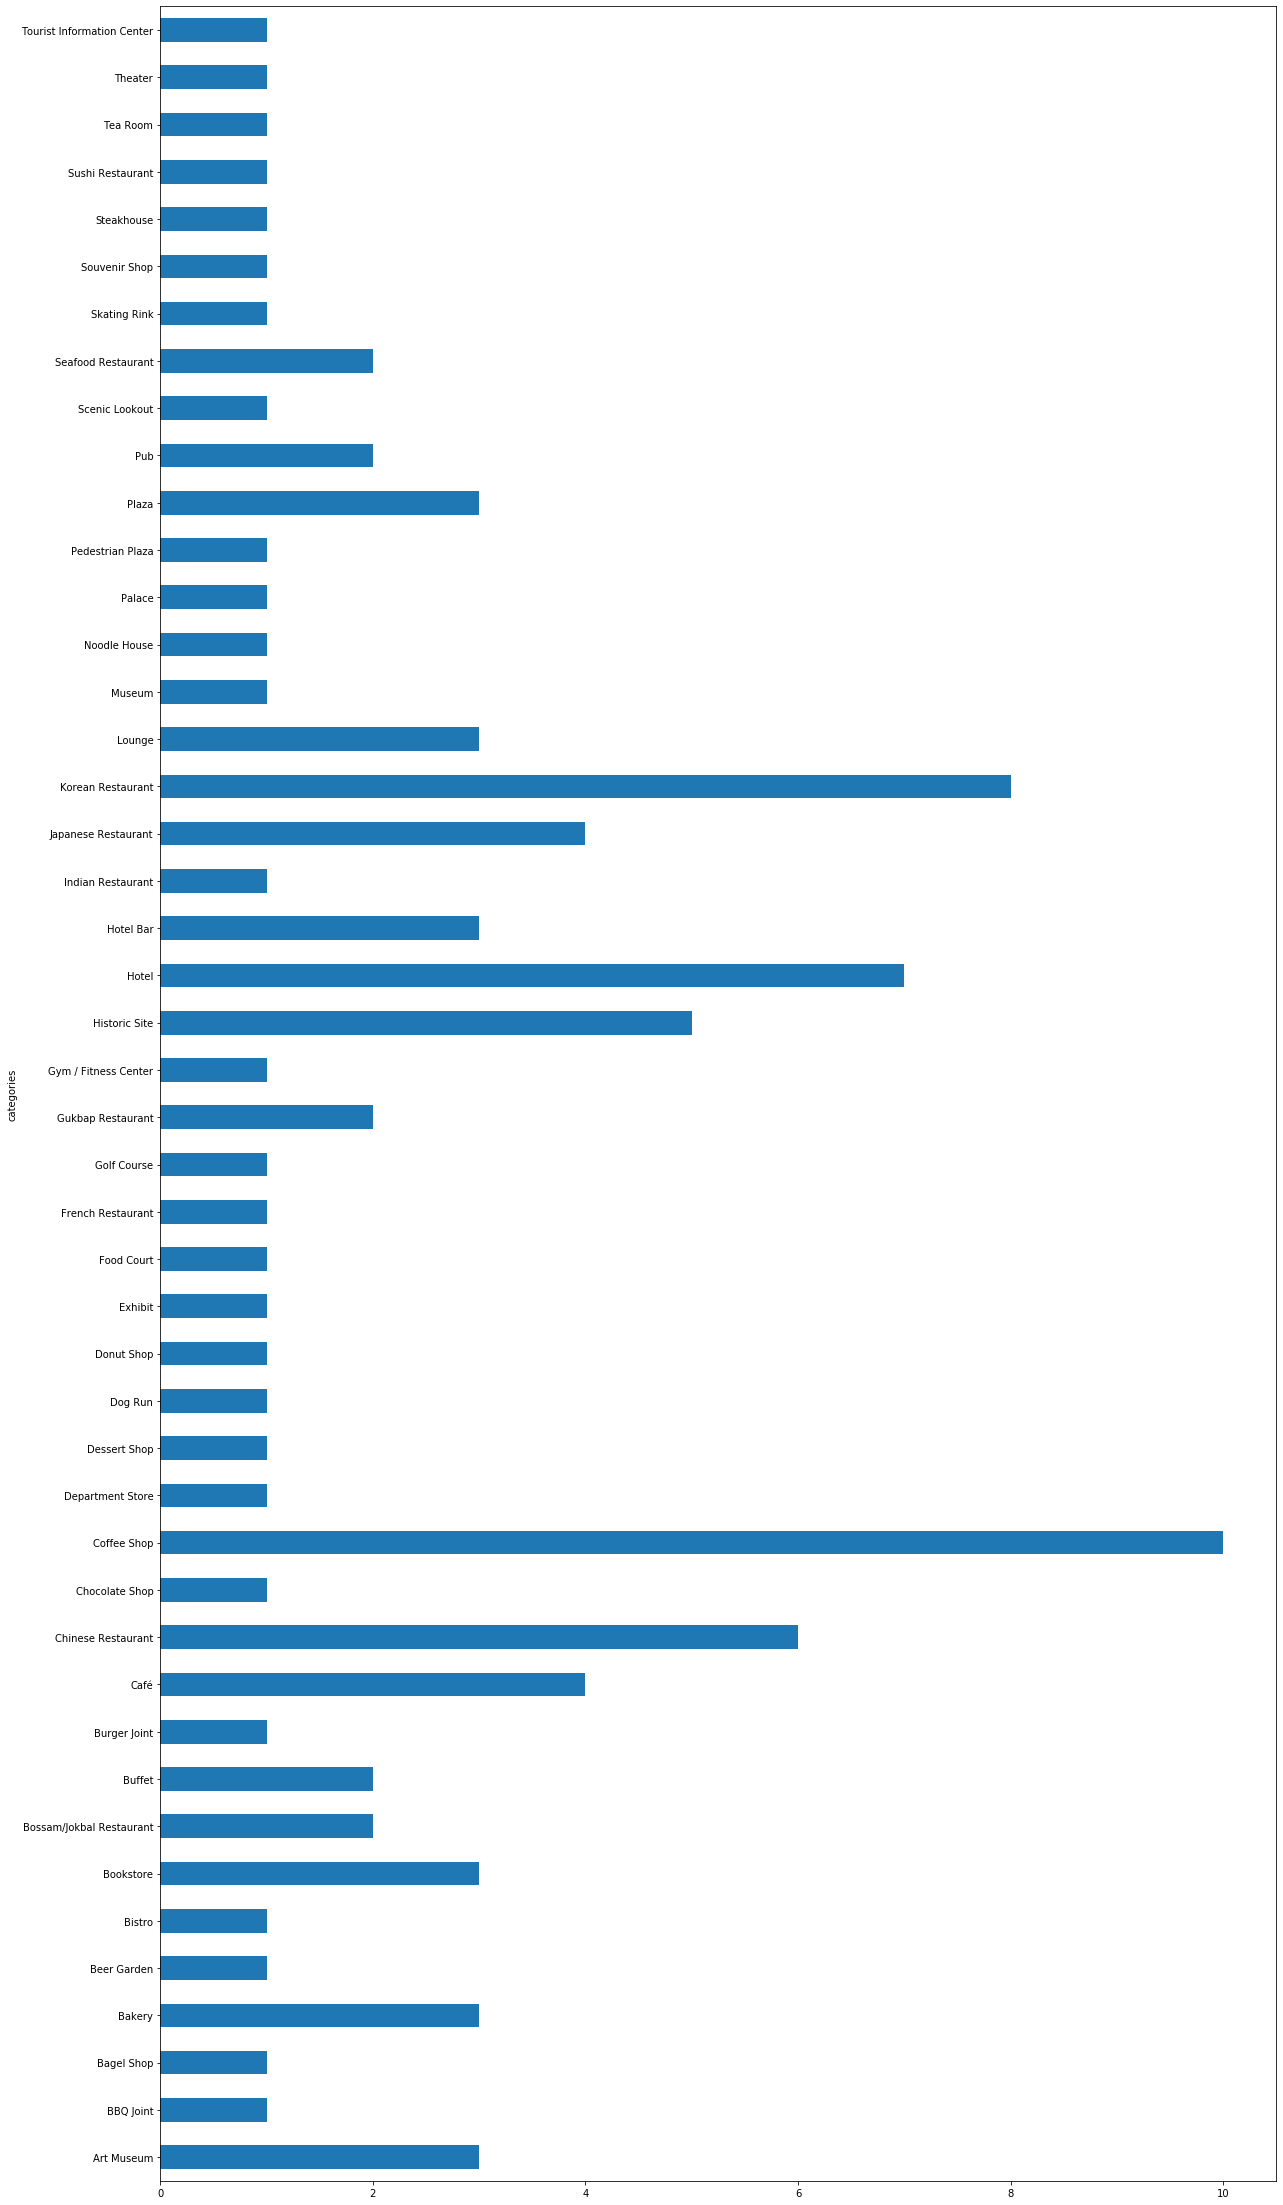

In [47]:
df_seoul['name'].plot(kind='barh',
                 figsize = [20,40])



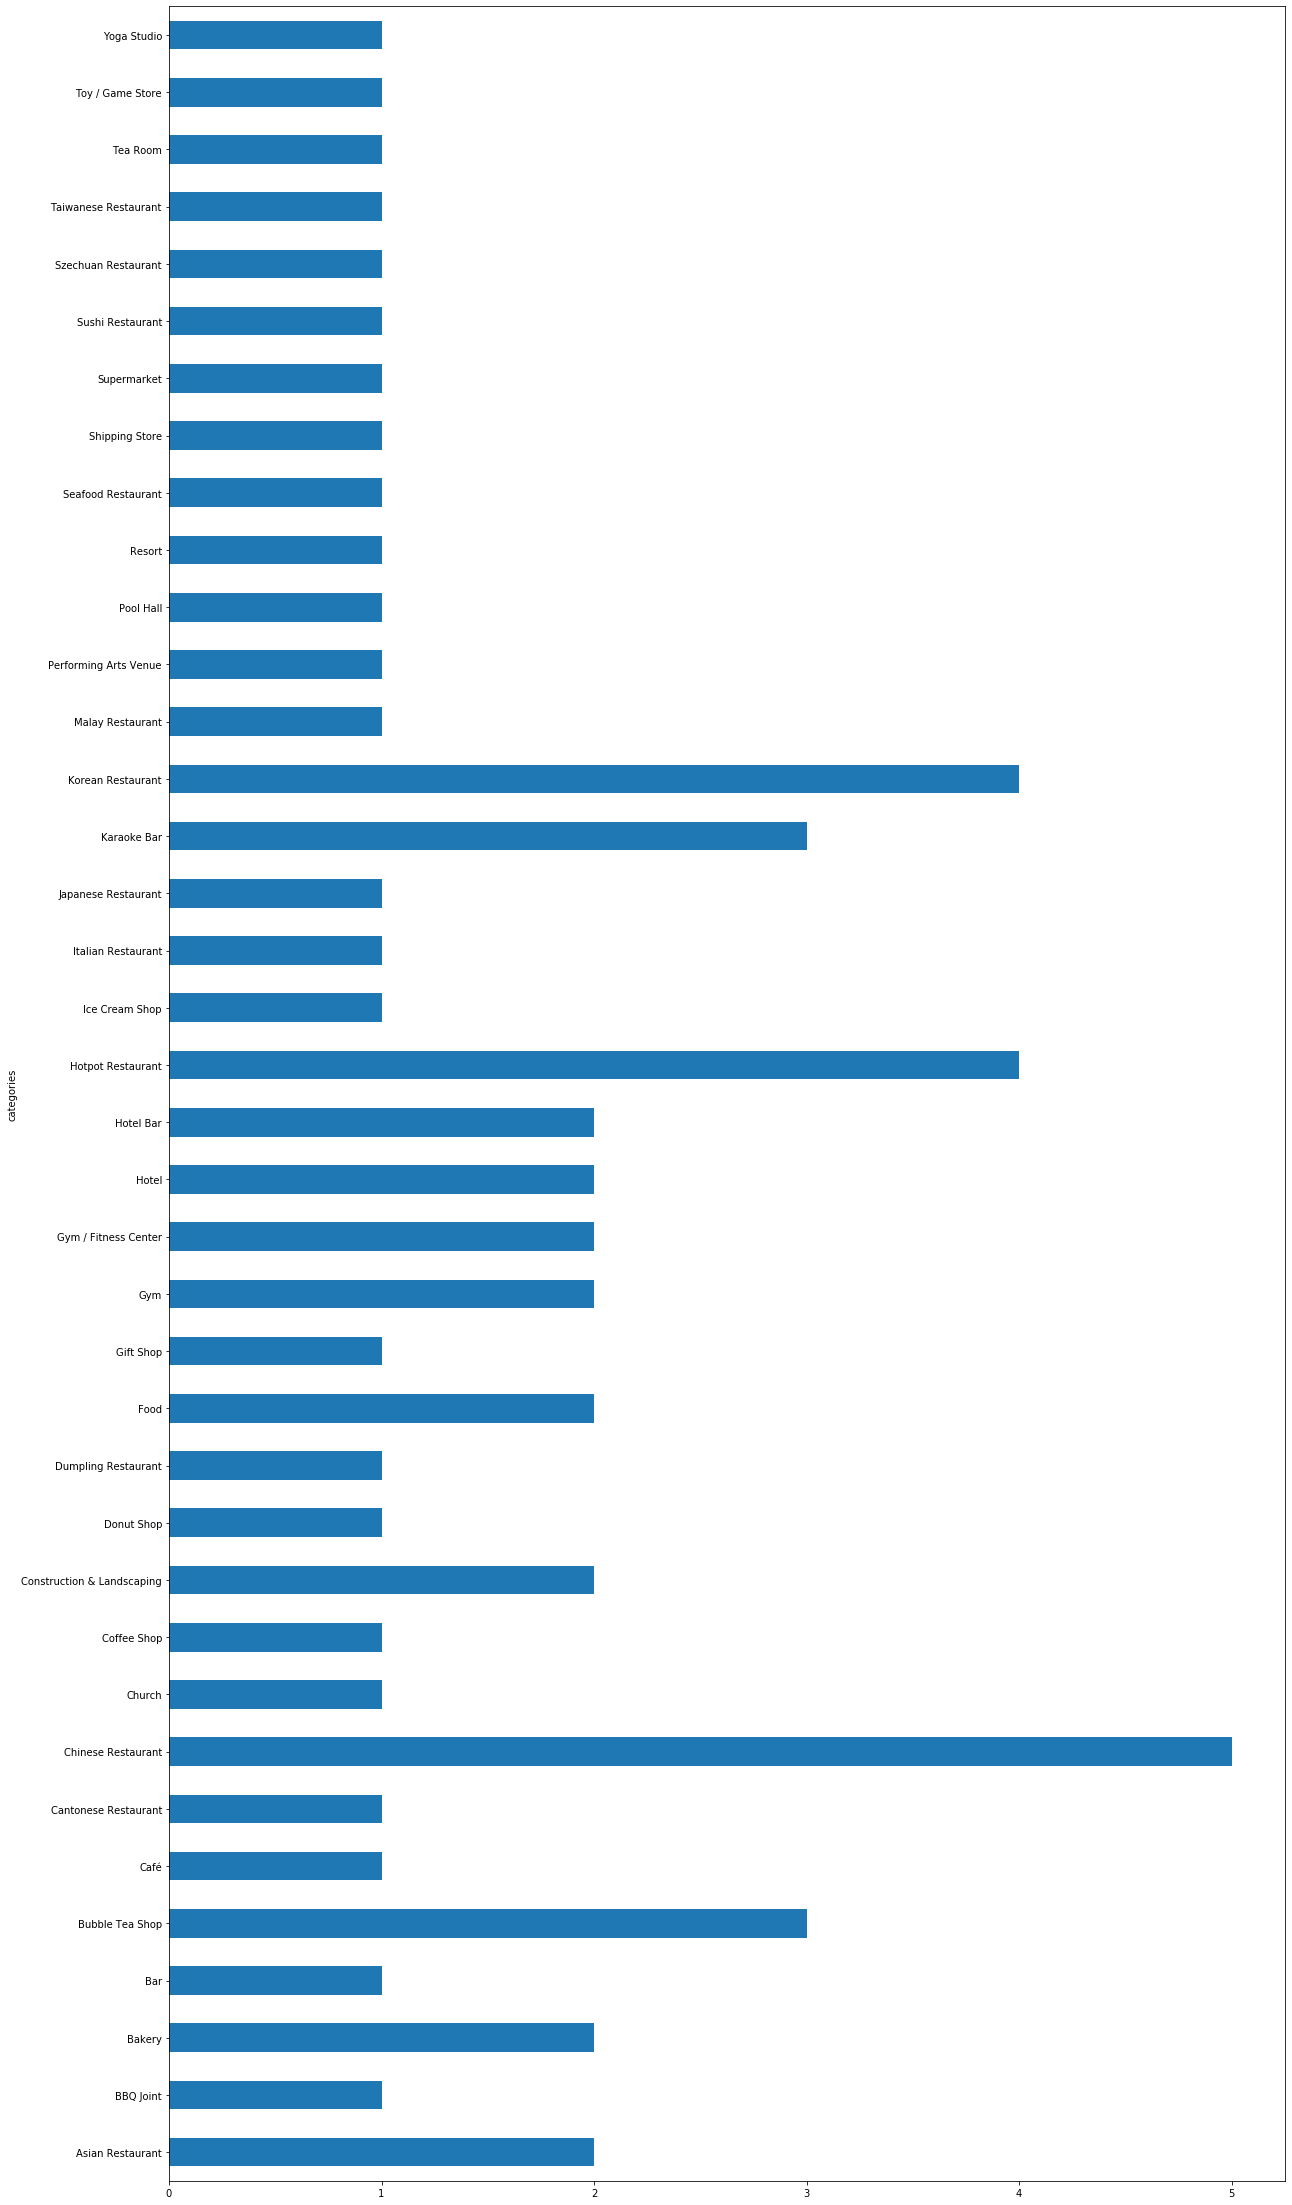

In [48]:
df_flushing['name'].plot(kind='barh',
                 figsize = [20,40])

# Conclusion

In Seoul, there are lots of cafe comparing to flushing in US. Starting cafe business in Flushing is reasonable. 